# Project: Investigating FBI Gun Data and Census Data

### By: Katia Lopes-Gilbert

_July 2023_

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, I have decided to analyze and compare FBI background check data for gun purchases to Census data. I will review demographic trends in indviduals states, general trends over time for FBI background checks, and comparing the datasets to see if certain demographic characteristics are associated with higher or lower background checks. 

### High Level Overview of the Datasets
**FBI Data** 
Data from the FBI's National Instant Criminal Background Check System (NCIS) is used to determine whether a prospective buyer is eligible to buy firearms. 

> When a person tries to buy a firearm, the seller, known as a Federal Firearms Licensee (FFL), contacts NICS electronically or by phone. The prospective buyer fills out the ATF form, and the FFL relays that information to the NICS. The NICS staff performs a background check on the buyer. That background check verifies the buyer does not have a criminal record or isn't otherwise ineligible to purchase or own a firearm. Since launching in 1998, more than 300 million checks have been done, leading to more than 1.5 million denials.
>

You can read more about NCIS firearm checks [here](https://www.fbi.gov/how-we-can-help-you/more-fbi-services-and-information/nics). 

**Census Data**
The data has been supplemented with state level data from the Census American Community Survey (ACS). ACS data generally contains population statistics such as demographic and socioeconomic data.  

> The ACS helps local officials, community leaders, and businesses understand the changes taking place in their communities. It is the premier source for detailed population and housing information about our nation.
>

You can read more about Census ACS data [here](https://www.census.gov/programs-surveys/acs). 

### Notes about the NCIS Data
The original PDF of the NCIS firearm checks data contains important notes and caveats. It's a good idea to read those first before diving into the data. Among the caveats is this important one — emphasis added:

> These statistics represent the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold. Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale.
>

### Downloading the Data

FBI NCIS Background Check Dataset: [**click here to download the FBI data.**](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a4db8_gun-data/gun-data.xlsx&sa=D&source=editors&ust=1690055166882138&usg=AOvVaw2NXkKn2SPaQBva5xby3KAN)

Census ACS Dataset: [**click here to download the Census data.**](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv&sa=D&source=editors&ust=1690055166882803&usg=AOvVaw3oW2CN2wlOxBkVvLM8L5M5)


✅ Great, now that you have downloaded the datasets, let's get started! 🚀
----------

-----

## Questions We Will Explore 🔎

I have chosen to explore each dataset individually as well as conduct some comparative analysis to look at any interesting trends and correlation. 

**📓 Census Data Analysis Questions:**
1. Which states had the most population growth from 2010 to 2016?
2. What is the distribution of race or ethnicity for each state?
3. Are poverty levels correlated with specific demogrpahic factors like race, ethnicity, foreign born individuals, and educational levels?

**📓 FBI Background Check Data Analysis Questions:**
1. What are the overall trends overtime for firearm background checks for handguns and long guns?
2. What time of the year is the most common for background checks?
3. Do certain states have higher numbers of handguns? What about long guns?

**📓 Comparing the Datasets:**
1. Which states have the highest firearm checks per capita?
2. Are certain demographic characteristics correlated with more background checks?

I will answer these questions by providing visualizations and insights. 📊

<a id='wrangling'></a>
## Data Wrangling

I conducted my initial analysis in a separate Jupyter Notebook file called [Initial Analysis](https://github.com/dezertdweller/fbi-gun-background-checks/blob/main/initial-analysis.ipynb). Please refer to this document for a more in-depth review of the operations I performed to understand each dataset and what errors would need to be corrected before further analysis.

I decided to write Python scripts for the cleaning and transformation of both datasets. I will provide summaries of the operations I performed below. However, please refer to the respective documents for each dataset to see how I cleaned and transformed both. 

----

### 📋 FBI Data Overview
I was most interested in how to use the FBI Firearm Background Check data to estimate number of firearms purchased in each state. While analyzing the data, I read several papers from NCIS and independent researchers to better understand what each column signified in this dataset and which ones would be best for further analysis.

The FBI Firearm Background Check data contains 12485 records and 27 columns. Below is a description of what the first 7 columns represents:
1. _Permit_: any permit check
2. _Permit Recheck_: any permit recheck
3. _Handgun_: permit check for any firearm which has a short stock and is designed to be held and fired by the use of a single hand; and (b) any combination of parts from which a firearm described in paragraph (a) can be assembled.
4. _Long Gun_: permit check for a weapon designed or redesigned, made or remade, and intended to be fired from the shoulder, and designed or redesigned and made or remade to use the energy of the explosive in (a) a fixed metallic cartridge to fire a single projectile through a rifled bore for each single pull of the trigger; or (b) a fixed shotgun shell to fire through a smooth bore either a number of ball shot or a single projectile for each single pull of the trigger.
5. _Other_: permit check for frames, receivers, and other firearms that are neither handguns nor long guns (rifles or shotguns), such as firearms having a pistol grip that expel a shotgun shell, or National Firearms Act firearms, including silencers.
6. _Multiple_: permit check for when an individual is interested in more than one type of firearm (i.e. handgun and a long gun)
7. _Admin_: the administrative checks that are for other authorized uses of the NICS

Additional columns include handgun permits, long gun permits, and other permits for six specific categories including pre-pawn, redemption, returned/diposition, rentals, private sale, and return to seller-private sale. Definitions are included below about what each of these categories mean:
1. _Pre-Pawn Handgun_: background checks requested by an officially-licensed FFL on prospective firearm transferees seeking to pledge or pawn a firearm as security for the payment or repayment of money, prior to actually pledging or pawning the firearm.
2. _Redemption_: background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to regain possession of a firearm after pledging or pawning a firearm as security at a pawn shop.
3. _Returned/Disposition_: background checks requested by criminal justice/law enforcement agencies prior to returning a firearm in its possession to the respective transferee, to ensure the individual is not prohibited.
4. _Rentals_: background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm when the firearm is loaned or rented for use off the premises of the business.
5. _Private Sale_: background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.
6. _Return to Seller-Private Sale_: background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.

After reading more about the data collected from NCIS, I decided to eliminate the permit and permit recheck columns. Although these provide data about the overall production of NCIS when it comes to running firearm background checks, these data are useless for estimating number of firearms purchased in certain states. A [research paper](https://www.smallarmssurvey.org/sites/default/files/resources/SAS-WP14-US-Firearms-Industry.pdf) from 2013 titled _The US Firearms Industry: Production and Supply_ by Jurgen Brauer describes why using several examples below:

> _For example, from November 1998 to February 2012 NICS recorded ten million so-called ‘permit’ checks for the state of Kentucky. For the same state it also recorded more than one million addi- tional ‘handgun’ checks and 1.6 million ‘long gun’ checks. A ‘permit’ refers to a firearms-carrying licence issued by the state of Kentucky. The state checks monthly whether any of its permit holders may no longer be eligible for gun ownership, e.g. as a result of having committed a felony. Thus, Kentucky’s permit checks amount to continued eligibility checks that are wholly unrelated to a prospective customer’s intent to purchase a firearm from a licensed dealer. Similarly, Utah’s permits are checked every 90 days against FBI records. Each state maintains its own rules regarding the frequency, if any, with which its issued permits are checked against FBI records._
>

I have also decided to remove the following columns because they are unrelated to a prospective gun purchase: admin, prepawn_handgun, prepawn_long_gun, prepawn_other, redemption_handgun, redemption_long_gun, redemption_other, returned_handgun, returned_long_gun, returned_other, rentals_handgun, and rentals_long_gun.

Finally, I removed the 'totals' column because this no longer represented totals based on the data I was leaving in the dataset. 

#### Summary of FBI Data Cleaning 🫧🧽
Overall, this dataset was very clean and didn't have errors. However, to conduct further analysis of the FBI data, I would need to perform the following sets to clean the data:
* Convert the excel file to a csv file.
* Convert the month column into a datetime column so this can be used for further analysis.
* Create a new column for the year.
* Create a new column for the month.
* Create a new totals column based on the fields I am keeping.
* Fill the null values with '0' so that these can be analyzed.

I also wanted to simplify my comparative analysis to the Census dataset by removing geographies from the FBI data that were not present in the Census data. I removed records for the following geographic areas: District of Columbia, Guam, Mariana Islands, Puerto Rico, and Virgin Islands. 

📁 [FBI Cleaning Script](https://github.com/dezertdweller/fbi-gun-background-checks/blob/main/fbi-cleaning.py)

---

### 📋 Census Data Overview
The Census ACS data contains 85 records and 52 columns. In reviewing how the data was presented, most columns represented individual states and each state had specific facts. I knew I would want to transpose the data in long format to make it easier to analyze later. Additionally, the Census data would require much more cleaning prior to doing this transformation.

#### Summary of Census Data Cleaning 🫧🧽
The Census data had several irregularities that would need to be addressed. Below I have summarized what I would need to do to clean this dataset:
1. Remove symbols from the data including commas, percentages, and dollar signs.
2. Convert the columns with percentages into their decimal values.
3. Delete rows 64 through 80 because they mostly contain null values that were irrelevant for my analysis:
    64-FIPS Code, 
    65-NaN, 
    66-NOTE: FIPS Code values are enclosed in quotes ...,
    67-Value Notes,
    68-1,
    69-Fact Notes,
    70-(a),
    71-(b),
    72-(c),
    73-Value Flags,
    74--,
    75-D,
    76-F,
    77-FN,
    78-S,
    79-X,
    80-Z

4. Replace all null values with 0.
5. Convert all of the data for each state into numerical values for analysis. This would not apply to the information in the 'Fact' column.
6. Transpose the data so that the columns are organized for each Fact and State would be a new column with each state as a string value.
7. Shorten the names for the columns to make the dataset easier to read and digest.

After cleaning and transforming the Census data, I realized that there were several columns I was not interested in for my analysis. Since most of the demographic data was for 2010 or 2016, I removed data that was for other years (ex: Total retail sales, 2012). I left most of the data that was for 5-year estimates, as this is pretty standard for how ACS collects data over time. Additionally, I was not particularly interested in the data about housing units, mortgages, or firms, so I removed these as well. 

Since the Census data required significantly more work to clean and transform the data, I saved the cleaning and tranformation as two separate documents:

📁 [Census Cleaning Script](https://github.com/dezertdweller/fbi-gun-background-checks/blob/main/census-cleaning.py)

📁 [Census Transformation Script](https://github.com/dezertdweller/fbi-gun-background-checks/blob/main/census-transformation.py)

---
❗**Note:** Make sure to change the file path with the correct path to where you want to save the transformed datasets. If you are running these scripts on your computer, you will want to modify each `load_data()` and `save_data()` functions to ensure they have the correct paths. For the FBI data, you will also need to modify the path for the `convert_to_csv()` function.

---

<a id='eda'></a>
## Exploratory Data Analysis 🔭

These are the questions we are going to explore for each dataset:

**📓 Census Data Analysis Questions:**
1. Which states had the most population growth from 2010 to 2016?
2. What is the distribution of race or ethnicity for each state?
3. Are poverty levels correlated with specific demogrpahic factors like race, ethnicity, foreign born individuals, and educational levels?

**📓 FBI Background Check Data Analysis Questions:**
1. What are the overall trends overtime for firearm background checks for handguns and long guns?
2. What time of the year is the most common for background checks?
3. Do certain states have higher numbers of handguns? What about long guns?

**📓 Comparing the Datasets:**
1. Which states have the highest firearm checks per capita?
2. Are certain demographic characteristics correlated with more background checks?

### Import and Load

First, we need to import the appropriate packages and load the data.

❗**Note:** Make sure to change the file path with the correct path to where you have saved the transformed datasets. You will need to modify the `read_csv()` functions below if you want to run this notebook on your machine.

---

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter

colors = sns.color_palette("hls", 8)

# load the data
df_census = pd.read_csv('/Users/katialopes-gilbert/data-files/ncis-and-census-data/us-census-data-transformed.csv')

df_fbi = pd.read_csv('/Users/katialopes-gilbert/data-files/ncis-and-census-data/gun_data_clean.csv')

### Which states had the most population growth from 2010 to 2016?

In [43]:
# First I want to sort the census data by the % population growth column in descending order. 
# Then I want to create a dataframe with only the top 10 states for population growth.

percent_change = df_census.sort_values(by='Population Percent Change 2010-2016', ascending=False)
df_top_10_percent_change = percent_change[['State','Population Percent Change 2010-2016']].head(10)
df_top_10_percent_change['Population Percent Change 2010-2016'] = df_top_10_percent_change['Population Percent Change 2010-2016'] * 100
df_top_10_percent_change

,State,Population Percent Change 2010-2016
33,North Dakota,12.7
42,Texas,10.8
43,Utah,10.4
5,Colorado,10.2
8,Florida,9.6
27,Nevada,8.9
2,Arizona,8.4
46,Washington,8.4
11,Idaho,7.4
39,South Carolina,7.3


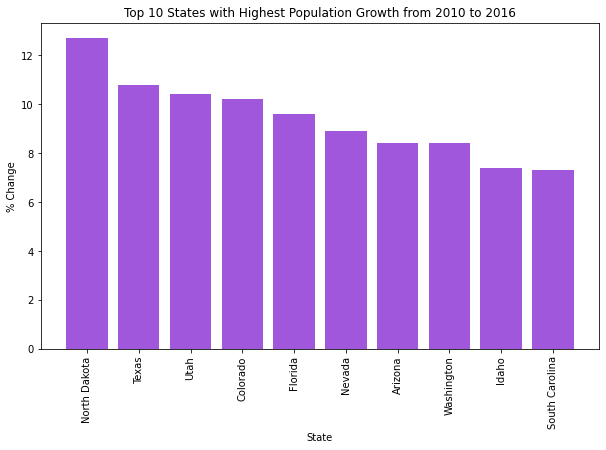

In [44]:
# Now I want to represent this table visually.

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(df_top_10_percent_change['State'], df_top_10_percent_change['Population Percent Change 2010-2016'], color=colors[6])
ax.set_xlabel('State')
ax.set_ylabel('% Change')
ax.set_title('Top 10 States with Highest Population Growth from 2010 to 2016')
plt.xticks(rotation=90)
plt.show()

💡 **Observations**  
Despite having one of the smallest overall populations, North Dakota had the hightest population growth between 2010 and 2016! It was followed by Texas, Utah, Colorado, Florida, Nevada, Washington, Idaho, and South Carolina.

### What is the distribution of race or ethnicity for each state?

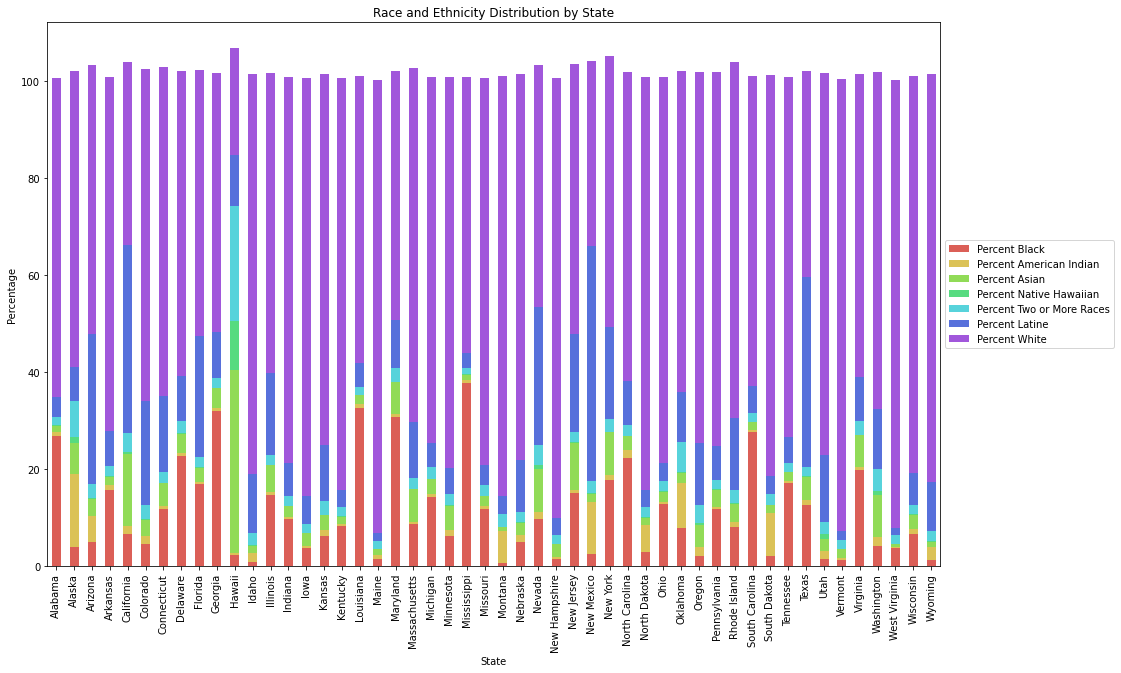

In [45]:
# Create a dataframe with each state and race/ethnicity.
df_race = df_census.copy()
columns = ['Percent Black', 'Percent American Indian', 'Percent Asian', 
           'Percent Native Hawaiian', 'Percent Two or More Races', 'Percent Latine', 'Percent White']

# Multiply by 100 to convert from proportion to percentage if necessary
df_race.loc[:, columns] *= 100


# Plot
fig, ax = plt.subplots(figsize=(16,10))
df_race.set_index('State')[columns].plot(kind='bar', stacked=True, color=colors, ax=ax)
ax.set_xlabel('State')
ax.set_ylabel('Percent')
ax.set_title('Race and Ethnicity Distribution by State')
plt.xticks(rotation=90)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

An inconsistency with this data I am not sure how to address is that the when summing the totals for all racial and ethnic groups, we arrive at values over 100% for each state. Considering these values are supposed to represent that racial or ethnic group only, we should not be getting summed values over 100% as multi-racial people should be captured in the _Two or More Races_ category. 

In [46]:
df_census['Percent White'].describe()

count    50.000000
mean      0.693200
std       0.156635
min       0.221000
25%       0.595500
50%       0.729500
75%       0.803750
max       0.935000
Name: Percent White, dtype: float64

In [47]:
df_sorted = df_census.sort_values(by='Percent White', ascending=False)
print(df_sorted.loc[df_sorted.index[0], ['State', 'Percent White']])

State            Maine
Percent White    0.935
Name: 18, dtype: object


In [48]:
df_sorted = df_census.sort_values(by='Percent White', ascending=True)
print(df_sorted.loc[df_sorted.index[0], ['State', 'Percent White']])

State            Hawaii
Percent White     0.221
Name: 10, dtype: object


💡 **Observations:**  
The average percentage of White people across all states is 69%. The least diverse state in 2016 was Maine, with 93.5% of the population identifying as White. The most diverse state in 2016 was Hawaii, with 22.1% of the population identifying as White.

### Are poverty levels correlated with specific demogrpahic factors like race, ethnicity, foreign born individuals, languages, and educational levels?

In order to answer this, we will look at several scatter plots comparing poverty levels with other demographic factors.

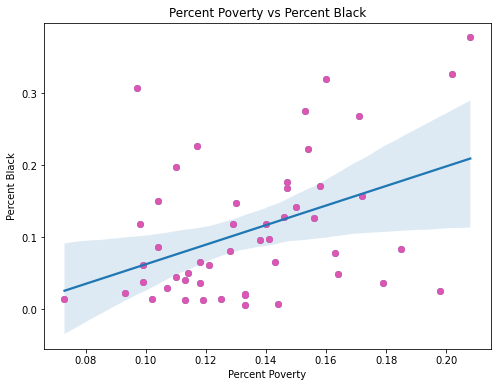

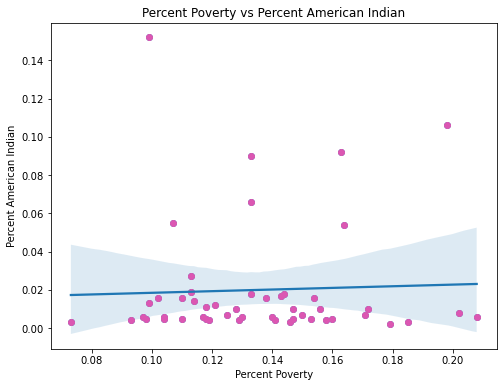

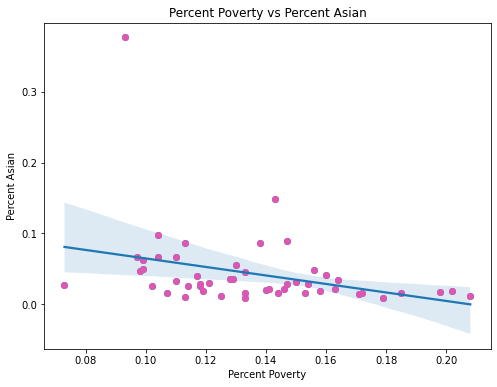

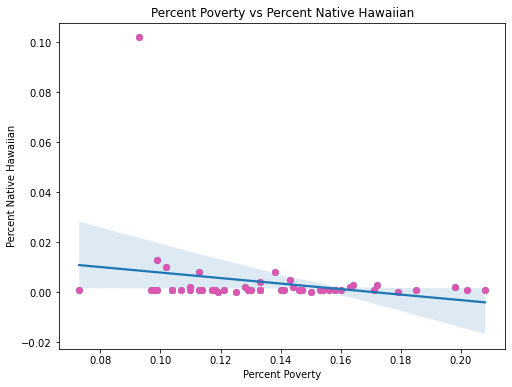

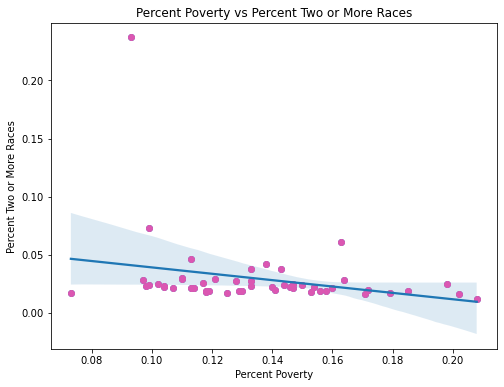

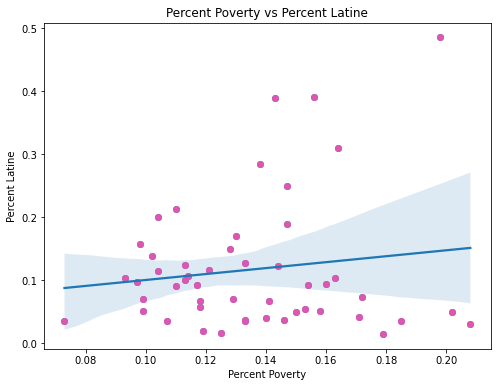

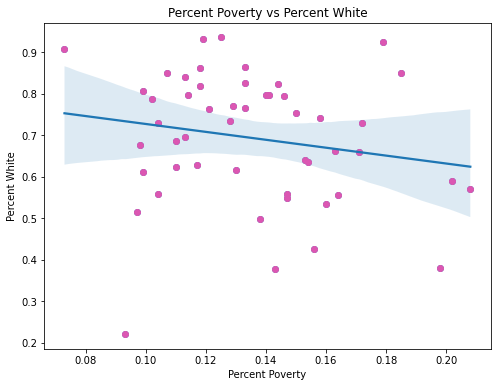

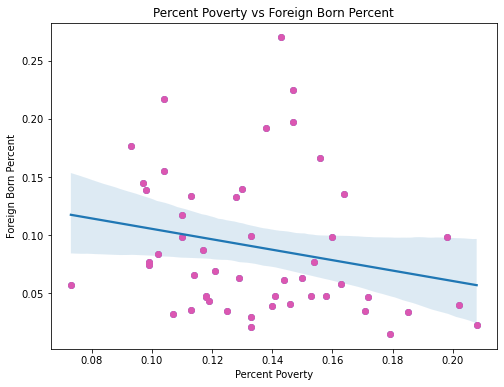

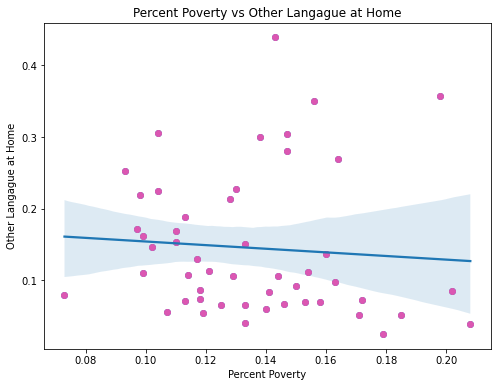

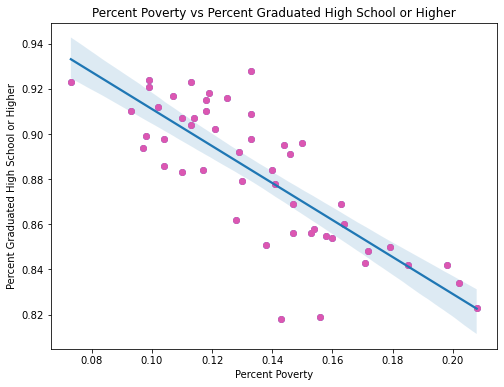

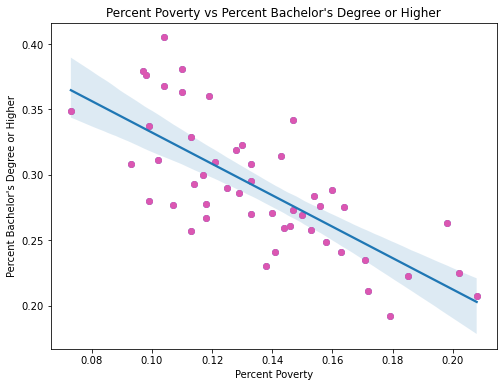

                                   Variable     Slope
0                             Percent Black  1.358018
1                   Percent American Indian  0.042794
2                             Percent Asian -0.601360
3                   Percent Native Hawaiian -0.110503
4                 Percent Two or More Races -0.273904
5                            Percent Latine  0.470863
6                             Percent White -0.952900
7                      Foreign Born Percent -0.448323
8                    Other Langague at Home -0.253069
9   Percent Graduated High School or Higher -0.818384
10      Percent Bachelor's Degree or Higher -1.199262


In [68]:
# First I only want to compare poverty levels to a subset of the census data, identified below:
columns = ['Percent Black', 'Percent American Indian', 'Percent Asian', 
           'Percent Native Hawaiian', 'Percent Two or More Races', 'Percent Latine', 
           'Percent White', 'Foreign Born Percent', 'Other Langague at Home', 
           'Percent Graduated High School or Higher', 'Percent Bachelor\'s Degree or Higher']

# Next I want to create an empty dictionary where I will add my linear regressions to.
slopes = {}

# Next I will create scatter plots for each of the identified columns and fill the slope dictionary.
for col in columns:
    plt.figure(figsize=(8,6))
    sns.regplot(x='Percent Poverty', y=col, data=df_census)
    plt.scatter(df_census['Percent Poverty'], df_census[col], color=colors[7])
    plt.xlabel('Percent Poverty')
    plt.ylabel(col)
    plt.title(f'Percent Poverty vs {col}')
    
    slope, _ = np.polyfit(df_census['Percent Poverty'], df_census[col], 1)
    slopes[col] = slope
    
    plt.show()

df_slopes = pd.DataFrame(list(slopes.items()), columns=['Variable', 'Slope'])

print(df_slopes)

💡 **Observations:**  
Several demographic factors show stronger correlation with higher poverty levels. States where there is a larger percent of the population that is either Black or Latine are more likely to have higher poverty rates. By comparison, states where there is a larger percentage of White or Asian people are less likely to have high poverty rates. This is consistent with information regarding how racism and discrimination contribute to worse outcomes for people of color, especially Black and Brown individuals.  

States that have overall higher educational attainment levels, including higher high school or college graduation rates, are also less likely to have high poverty rates.

### What time of the year is the most common for background checks?

In [97]:
# First, we need to aggregate total permits per state per month
df_monthly_permits = df_fbi.groupby(['state', 'month-name'])['total_permits'].sum().reset_index()

# Then, find the month with maximum permits for each state
df_busiest_month = df_monthly_permits.loc[df_monthly_permits.groupby('state')['total_permits'].idxmax()]

# Then, drop 'total_permits' column
df_busiest_month = df_busiest_month.drop(columns=['total_permits'])

print(df_busiest_month)

              state month-name
2           Alabama   December
14           Alaska   December
26          Arizona   December
38         Arkansas   December
50       California   December
62         Colorado   December
74      Connecticut   December
86         Delaware   December
98          Florida   December
110         Georgia   December
122          Hawaii   December
134           Idaho   December
146        Illinois   December
158         Indiana   December
170            Iowa   December
182          Kansas   December
194        Kentucky   December
206       Louisiana   December
226           Maine    October
230        Maryland   December
247   Massachusetts      March
254        Michigan   December
274       Minnesota    October
278     Mississippi   December
290        Missouri   December
302         Montana   December
314        Nebraska   December
326          Nevada   December
338   New Hampshire   December
350      New Jersey   December
362      New Mexico   December
374     

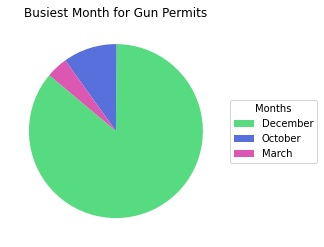

In [98]:
# Count the number of states with each month as their busiest
month_counts = df_busiest_month['month-name'].value_counts()

# Create a pie chart
chosen_colors = [colors[3], colors[5], colors[7]]

fig, ax = plt.subplots()
wedges, texts = ax.pie(month_counts, colors=chosen_colors, startangle=140)
ax.legend(wedges, month_counts.index,
          title="Months",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Busiest Month for Gun Permits')
plt.show()

💡**Observations:**  
December is by the the busiest month for gun permits!

### What are the overall trends overtime for firearm background checks for handguns and long guns?

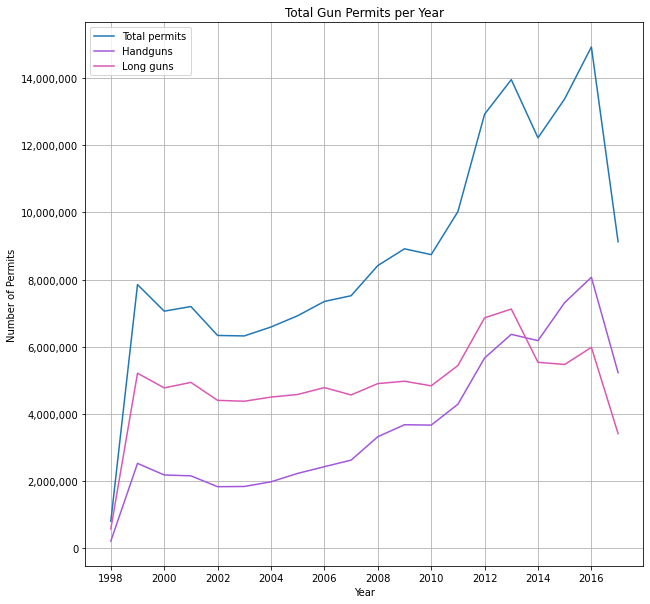

In [100]:
# First, we need to group by year and sum the counts
df_grouped = df_fbi.groupby('year').sum()

# Then we can create a plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.plot(df_grouped.index, df_grouped['total_permits'], label='Total permits')
plt.plot(df_grouped.index, df_grouped['handgun'], label='Handguns', color=colors[6])
plt.plot(df_grouped.index, df_grouped['long_gun'], label='Long guns', color=colors[7])

start, end = df_grouped.index.min(), df_grouped.index.max()
ax.xaxis.set_ticks(np.arange(start, end + 1, 2))

plt.title('Total Gun Permits per Year')
plt.xlabel('Year')
plt.ylabel('Number of Permits')
plt.legend()
plt.grid(True)

plt.show()

**Observations:**  
We can see that overall, background checks gun permits have increased dramatically since this data first started getting tracked in 1998. Handgun permits have increased more than long guns have, likely correlated with higher number of handgun sales in the U.S. 

I was suprised to see the massive drop in 2017, so I want to investigate this further. Below, I will find out what was the last month that we have data for in 2017, this may be able to explain why we are seeing such a large dip.

In [106]:
df_fbi['month'] = pd.to_datetime(df_fbi['month'])

# Filter DataFrame for 2017 only
df_2017 = df_fbi[df_fbi['month'].dt.year == 2017]

# Find the latest month in 2017
last_month_2017 = df_2017['month'].max()

print(last_month_2017)

2017-09-01 00:00:00


💡 **Observations:**  
We can see that the last month that we have data for in 2017 is September. Considering that the majority of firearm background checks happen in December and October (based on historical data), we can assume that 2017 actually will not result in a large decrease in firearm permits compared to prior years. 

### Do certain states have higher numbers of handguns? What about long guns?

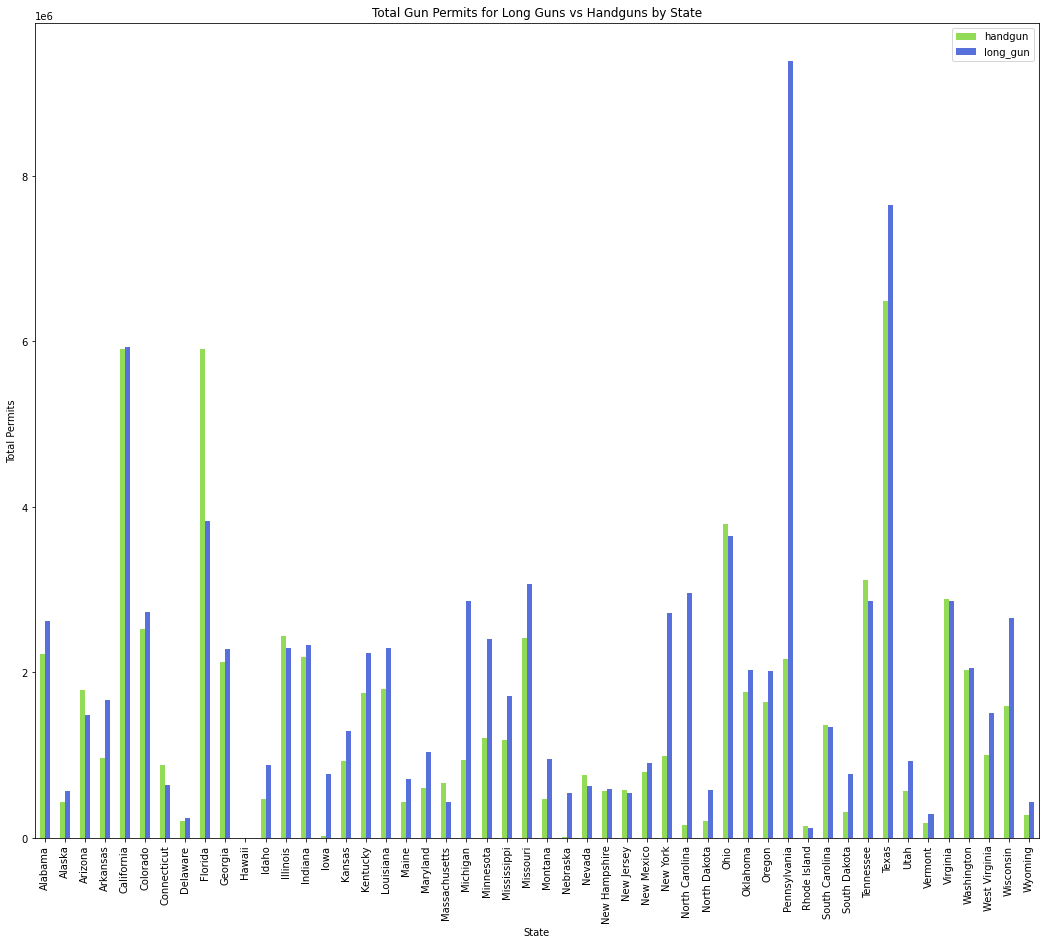

In [99]:
# First I want to create a new dataframe with just handgun and long gun permit checks for each state.
df_grouped = df_fbi.groupby('state')[['handgun', 'long_gun']].sum()

# Now I will create a bar plot
chosen_colors = [colors[2], colors[5]]

df_grouped.plot(kind='bar', stacked=False, figsize=(18,15), color=chosen_colors)
plt.xlabel('State')
plt.ylabel('Total Permits')
plt.title('Total Gun Permits for Long Guns vs Handguns by State')
plt.show()

💡 **Observations:**  
We can see that there are several states that have more handguns than long guns. I wanted to see which states did have more handguns in a list below. 

In [88]:
# Create a new column 'more_long_guns' to check if a state has more long guns than handguns
df_grouped['more_handguns'] = df_grouped['handgun'] > df_grouped['long_gun']

# Print the states which have more long guns than handguns
states_more_handguns = df_grouped[df_grouped['more_handguns']].index.tolist()
print("The states with more handguns than long guns are as follows:", ', '.join(states_more_handguns))

The states with more handguns than long guns are as follows: Arizona, Connecticut, Florida, Illinois, Massachusetts, Nevada, New Jersey, Ohio, Rhode Island, South Carolina, Tennessee, Virginia


### Which states had the highest firearm checks per capita in 2016?

In order to answer this question, I will look at the census population in 2016 for each state. I will then take the total permits for each state and divide that by the population for each state and multiply the result by 100,000.

In [107]:
# Create a dataframe with 2016 census total population data.
population_2016 = df_census[['State','Population 2016']]
population_2016

,State,Population 2016
0,Alabama,4863300.0
1,Alaska,741894.0
2,Arizona,6931071.0
3,Arkansas,2988248.0
4,California,39250017.0
5,Colorado,5540545.0
6,Connecticut,3576452.0
7,Delaware,952065.0
8,Florida,20612439.0
9,Georgia,10310371.0


In [108]:
# Create a dataframe with 2016 FBI data and group that data by each state
df_fbi_2016 = df_fbi[df_fbi['year'] == 2016]

df_fbi_agg = df_fbi_2016.groupby('state').sum()

df_fbi_2016_aggregated = df_fbi_agg.reset_index()

df_fbi_2016_aggregated.drop(['year'], axis=1, inplace=True)

df_fbi_2016_aggregated

,state,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,total_permits
0,Alabama,153123.0,121963.0,6104.0,6545,72.0,65.0,4.0,3.0,2.0,0.0,287881.0
1,Alaska,37491.0,36887.0,2889.0,2316,39.0,66.0,1.0,2.0,3.0,0.0,79694.0
2,Arizona,166784.0,108988.0,13122.0,7908,76.0,56.0,11.0,11.0,11.0,1.0,296968.0
3,Arkansas,80244.0,82120.0,3059.0,4400,72.0,64.0,6.0,7.0,4.0,1.0,169977.0
4,California,560355.0,554550.0,211707.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1326612.0
5,Colorado,242502.0,180026.0,15890.0,14293,0.0,0.0,0.0,0.0,0.0,0.0,452711.0
6,Connecticut,122375.0,43813.0,2445.0,0,0.0,2.0,0.0,0.0,0.0,0.0,168635.0
7,Delaware,25574.0,21746.0,1268.0,1034,590.0,195.0,32.0,12.0,3.0,0.0,50454.0
8,Florida,662308.0,316232.0,42439.0,25142,369.0,143.0,4.0,2.0,0.0,0.0,1046639.0
9,Georgia,194800.0,128277.0,6474.0,7478,53.0,53.0,11.0,2.0,9.0,0.0,337157.0


In [124]:
# First, I want to make sure both indexes are the same with the same state names.
assert (df_fbi_2016_aggregated.index == population_2016.index).all()

# Then, I want to create the new column to find the total permits per capita.
df_fbi_2016_aggregated['permits_per_100k'] = (df_fbi_2016_aggregated['total_permits'] / population_2016['Population 2016']) * 100000

# Now, I want to sort from highest permits per capita to lowest
df_sorted = df_fbi_2016_aggregated.sort_values(by='permits_per_100k', ascending=False)
df_sorted['permits_per_100k'] = df_sorted['permits_per_100k'].round(0).astype(int)

df_sorted[['state', 'permits_per_100k']].head(10)

,state,permits_per_100k
1,Alaska,10742
40,South Dakota,10562
47,West Virginia,9956
25,Montana,9522
49,Wyoming,8741
28,New Hampshire,8659
24,Missouri,8343
41,Tennessee,8201
35,Oklahoma,8182
5,Colorado,8171


💡 **Oberservation**  
The states with the highest number of permit checks per 100,000 are Alaska, South Dakota, West Virginia, Montana, Wyoming, New Hampshire, Missouri, Tennesee, Oklahoma, and Colorado. 

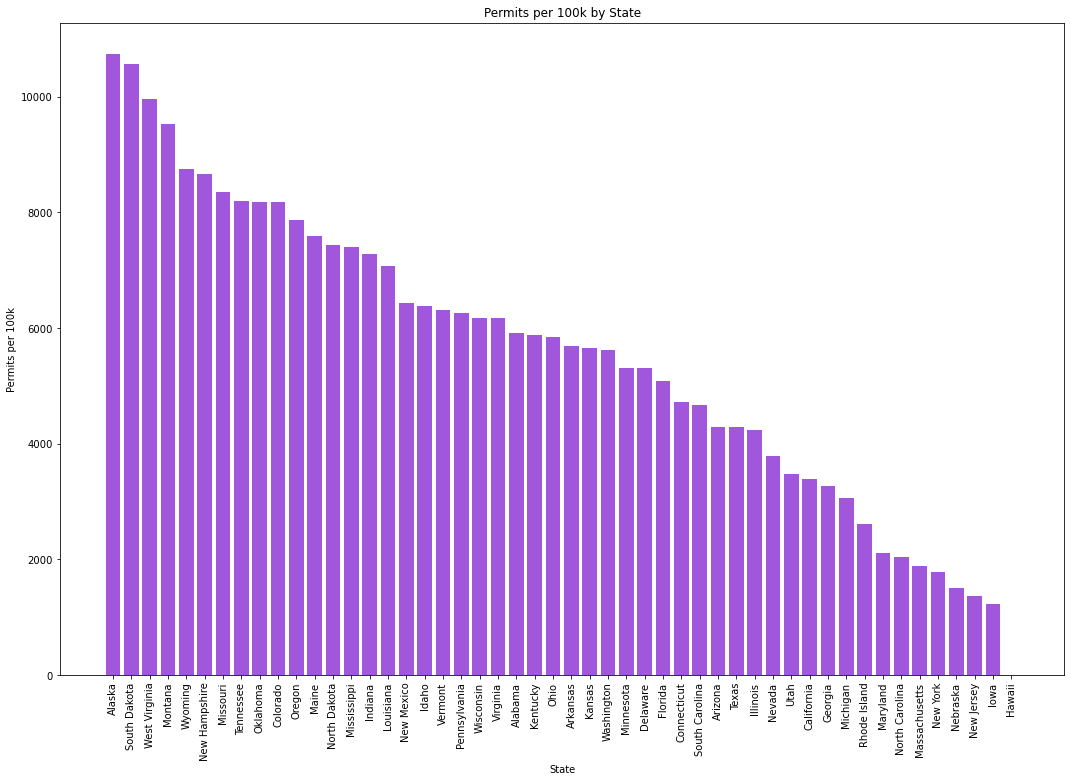

In [123]:
# Now let's visualize the data
fig, ax = plt.subplots(figsize=(18,12))
ax.bar(df_sorted['state'], df_sorted['permits_per_100k'], color=colors[6])
ax.set_xlabel('State')
ax.set_ylabel('Permits per 100k')
ax.set_title('Permits per 100k by State')
plt.xticks(rotation=90)
plt.show()

### Are certain demographic characteristics correlated with more background checks?

In [148]:
df_fbi_2016_aggregated.head()

,state,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,total_permits,permits_per_100k
0,Alabama,153123.0,121963.0,6104.0,6545,72.0,65.0,4.0,3.0,2.0,0.0,287881.0,5919.457981
1,Alaska,37491.0,36887.0,2889.0,2316,39.0,66.0,1.0,2.0,3.0,0.0,79694.0,10741.965833
2,Arizona,166784.0,108988.0,13122.0,7908,76.0,56.0,11.0,11.0,11.0,1.0,296968.0,4284.590361
3,Arkansas,80244.0,82120.0,3059.0,4400,72.0,64.0,6.0,7.0,4.0,1.0,169977.0,5688.182507
4,California,560355.0,554550.0,211707.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1326612.0,3379.901721


In [151]:
df_fbi_2016_aggregated.rename(columns = {'state':'State'}, inplace=True)
df_fbi_2016_aggregated.head()

,State,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,total_permits,permits_per_100k
0,Alabama,153123.0,121963.0,6104.0,6545,72.0,65.0,4.0,3.0,2.0,0.0,287881.0,5919.457981
1,Alaska,37491.0,36887.0,2889.0,2316,39.0,66.0,1.0,2.0,3.0,0.0,79694.0,10741.965833
2,Arizona,166784.0,108988.0,13122.0,7908,76.0,56.0,11.0,11.0,11.0,1.0,296968.0,4284.590361
3,Arkansas,80244.0,82120.0,3059.0,4400,72.0,64.0,6.0,7.0,4.0,1.0,169977.0,5688.182507
4,California,560355.0,554550.0,211707.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1326612.0,3379.901721


In [154]:
df_census.reset_index(inplace=True)
df_census.head()

,State,Population 2016,Population 2010,Population Percent Change 2010-2016,Population 2010.1,Under 5,Under 18,65 and over,Percent Female,Percent Black,...,Percent Bachelor's Degree or Higher,Percent Disability Under 65,Under 65 Uninsured Percent,Percent in Workforce,Median Household Income,Per Capita Income,Percent Poverty,Total Employer Establishments,Total Employment,Population per Square Mile
0,Alabama,4863300.0,4780131.0,0.017,4779736.0,0.060,0.226,0.161,0.516,0.268,...,0.235,0.118,0.107,0.580,43623.0,24091.0,0.171,98540.0,1634391.0,94.4
1,Alaska,741894.0,710249.0,0.045,710231.0,0.073,0.252,0.104,0.477,0.038,...,0.280,0.081,0.155,0.677,72515.0,33413.0,0.099,20907.0,267999.0,1.2
2,Arizona,6931071.0,6392301.0,0.084,6392017.0,0.063,0.235,0.169,0.503,0.049,...,0.275,0.082,0.119,0.593,50255.0,25848.0,0.164,136352.0,2295186.0,56.3
3,Arkansas,2988248.0,2916025.0,0.025,2915918.0,0.064,0.236,0.163,0.509,0.157,...,0.211,0.123,0.093,0.585,41371.0,22798.0,0.172,65175.0,1003113.0,56.0
4,California,39250017.0,37254522.0,0.054,37253956.0,0.063,0.232,0.136,0.503,0.065,...,0.314,0.068,0.083,0.631,61818.0,30318.0,0.143,908120.0,14325377.0,239.1


In [155]:
# I was running into an issue when first attempting to join these datasets on the State column. 

# Make sure the values for each State are identical
df_census['State'] = df_census['State'].str.strip().str.lower()
df_fbi_2016_aggregated['State'] = df_fbi_2016_aggregated['State'].str.strip().str.lower()

In [158]:
df_merged = pd.merge(df_census, df_fbi_2016_aggregated, how='inner', left_on='State', right_on='State')

In [159]:
df_merged.head()

,State,Population 2016,Population 2010,Population Percent Change 2010-2016,Population 2010.1,Under 5,Under 18,65 and over,Percent Female,Percent Black,...,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,total_permits,permits_per_100k
0,alabama,4863300.0,4780131.0,0.017,4779736.0,0.060,0.226,0.161,0.516,0.268,...,6104.0,6545,72.0,65.0,4.0,3.0,2.0,0.0,287881.0,5919.457981
1,alaska,741894.0,710249.0,0.045,710231.0,0.073,0.252,0.104,0.477,0.038,...,2889.0,2316,39.0,66.0,1.0,2.0,3.0,0.0,79694.0,10741.965833
2,arizona,6931071.0,6392301.0,0.084,6392017.0,0.063,0.235,0.169,0.503,0.049,...,13122.0,7908,76.0,56.0,11.0,11.0,11.0,1.0,296968.0,4284.590361
3,arkansas,2988248.0,2916025.0,0.025,2915918.0,0.064,0.236,0.163,0.509,0.157,...,3059.0,4400,72.0,64.0,6.0,7.0,4.0,1.0,169977.0,5688.182507
4,california,39250017.0,37254522.0,0.054,37253956.0,0.063,0.232,0.136,0.503,0.065,...,211707.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1326612.0,3379.901721


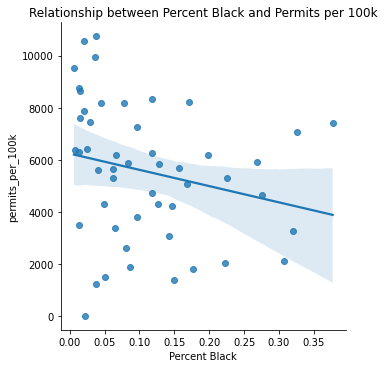

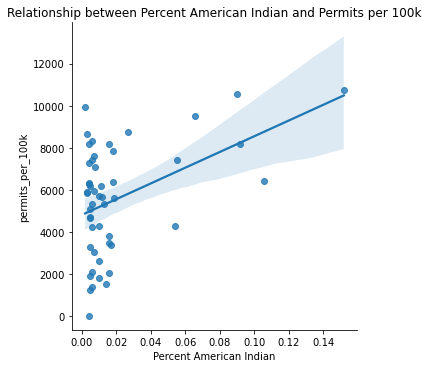

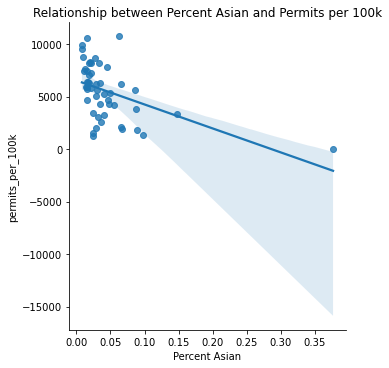

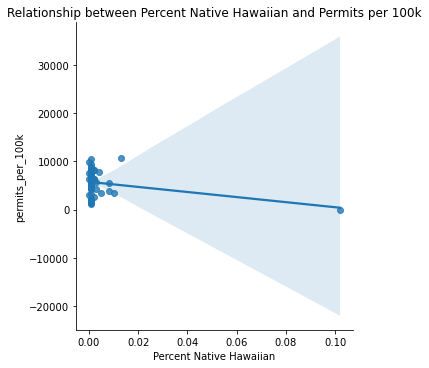

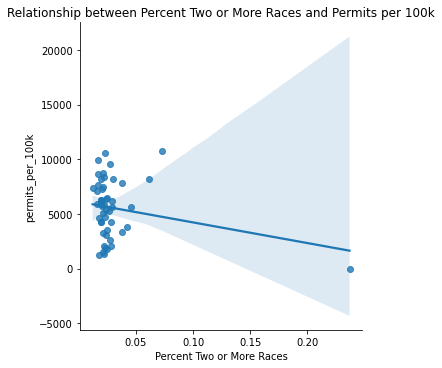

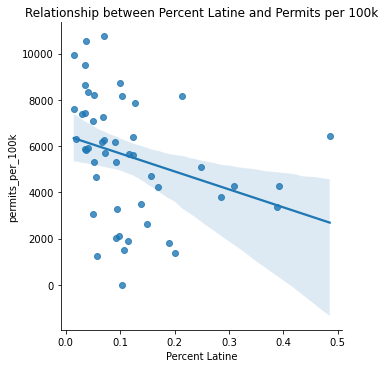

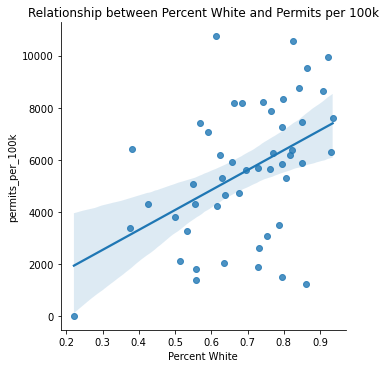

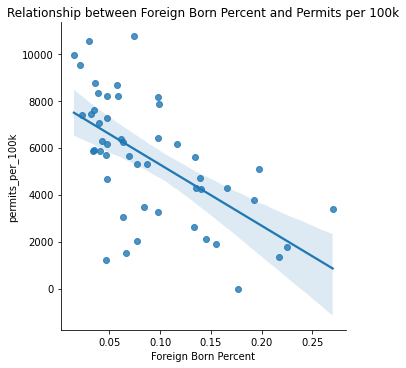

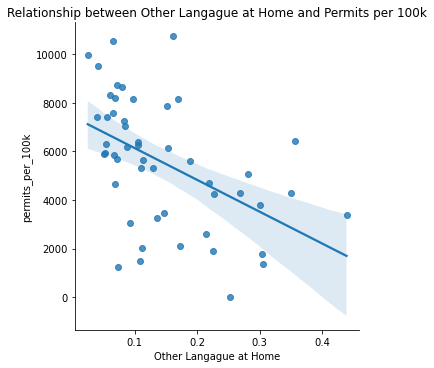

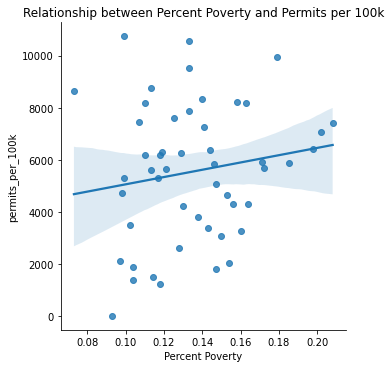

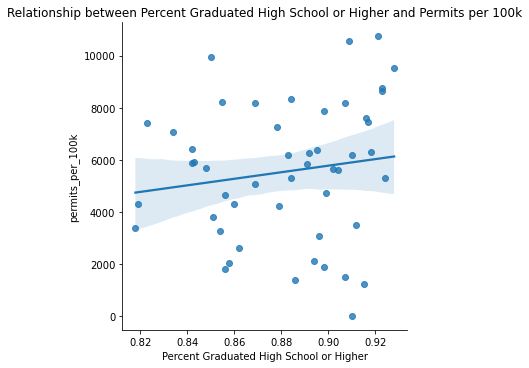

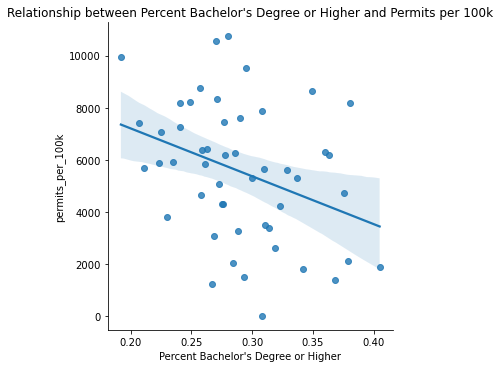

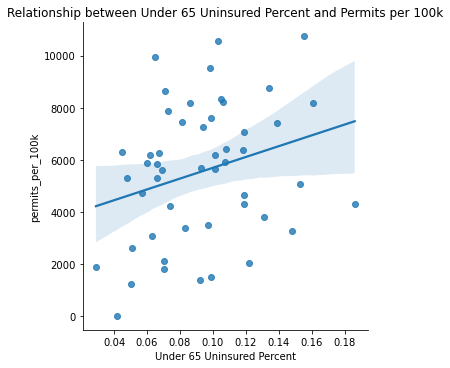

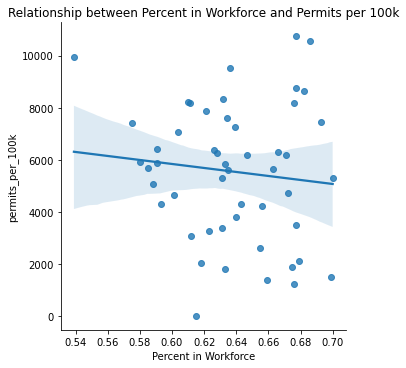

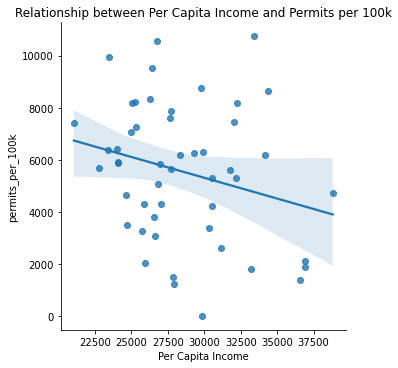

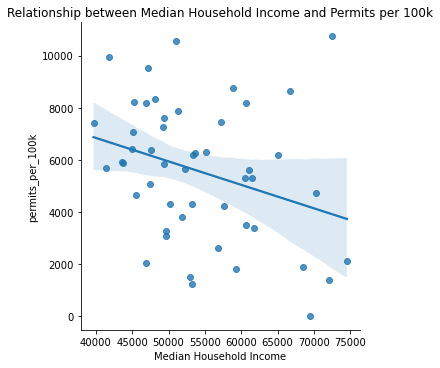

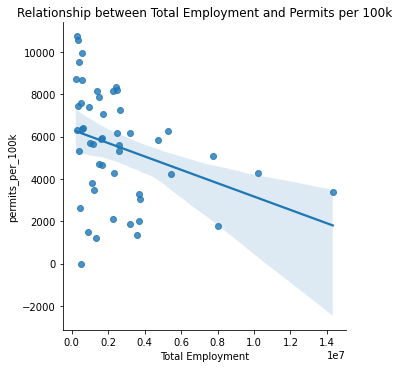

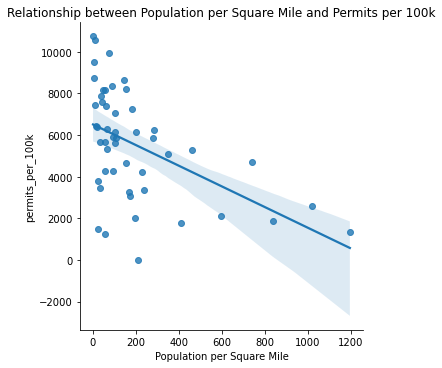

In [168]:
# Define the columns you want to compare
columns = ['Percent Black', 'Percent American Indian', 'Percent Asian', 
           'Percent Native Hawaiian', 'Percent Two or More Races', 'Percent Latine', 
           'Percent White', 'Foreign Born Percent', 'Other Langague at Home', 'Percent Poverty',
           'Percent Graduated High School or Higher', 'Percent Bachelor\'s Degree or Higher', 
           'Under 65 Uninsured Percent', 'Percent in Workforce', 'Per Capita Income', 'Median Household Income',
           'Total Employment','Population per Square Mile',]

# Loop over each column and create a scatter plot
for column in columns:
    sns.lmplot(x=column, y='permits_per_100k', data=df_merged)
    plt.title(f'Relationship between {column} and Permits per 100k')
    plt.show()

💡 **Observations:**  
The most interesting correlation for me was to can see that states with higher percentage of foreign born residents or higher percentage of people who spoke another language at home had lower levels of gun background checks per capita compared to states with less foreigners.  

States with higher income per capita, higher median household income, and larger populations per square mile are correlated with higher gun permits per 100,000 people.

States wtih a higher percentage of White individuals was associated with higher rates of gun permit checks per 100,000 compared to states with higher percentage of Black or Latine individuals.

<a id='conclusions'></a>
## Conclusions

I hope you enjoyed walking through these datasets with me. I would love to know if you found some other interesting observations between the datasets. 👩🏾‍🏫 🚀

### Limitations
I didn't conduct any robust statistical analysis between the datasets. Further analysis may demonstrate other trends or correlation that I was not able to produce.

As mentioned earlier, the FBI data cannot be directly compared to actual gun ownership, so I removed columns that are more likely associated with the purchase of a gun. However, as the research paper I mentioned demonstrates, this cannot be directly compared.

Both datasets come from secondary sources, meaning the accuracy of the data is dependent on the accuracy of the source. It's possible that some data entries may be missing or inaccurate. This could potentially bias the results of the analysis.

While the datasets provide a snapshot of demographic factors and firearm permit information, they don't provide much contextual data. For instance, information about state laws regarding gun ownership, cultural attitudes towards firearms, or crime rates could significantly impact the number of permits.

The data could be used to identify correlations, but it's challenging to make definitive causal claims based on this data alone. For instance, although I found a correlation between certain demographic factors and gun permits, this doesn't necessarily mean that the demographic factor causes the difference in gun permits. There could be other underlying factors at play.